In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, spearmanr, skew

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from imblearn.ensemble import BalancedRandomForestClassifier

import joblib

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/airbnb-recruiting-new-user-bookings/New/airbnb-recruiting-new-user-bookings-train-(CHANGED).csv')
data

,Unnamed: 0,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,0,d1mm9tcy42,2014-01-01,20140101000936,MALE,62,basic,0,en,sem-non-brand,...,0.0,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
1,1,yo8nz8bqcq,2014-01-01,20140101001558,-unknown-,36,basic,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,4grx6yxeby,2014-01-01,20140101001639,-unknown-,36,basic,0,en,sem-brand,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,ncf87guaf0,2014-01-01,20140101002146,-unknown-,36,basic,0,en,direct,...,0.0,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4,4,4rvqpxoh3h,2014-01-01,20140101002619,-unknown-,33,basic,25,en,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73137,73810,zxodksqpep,2014-06-30,20140630235636,MALE,32,basic,0,en,sem-brand,...,0.0,18.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0
73138,73811,mhewnxesx9,2014-06-30,20140630235719,-unknown-,36,basic,0,en,direct,...,0.0,45.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
73139,73812,6o3arsjbb4,2014-06-30,20140630235754,-unknown-,32,basic,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
73140,73813,jh95kwisub,2014-06-30,20140630235822,-unknown-,33,basic,25,en,other,...,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
remove_cols = []
for i in data.columns:
  if len(data[i].unique()) == 1:
    remove_cols.append(i)

data = data.drop(columns = remove_cols + ['Unnamed: 0', 'id', 'date_account_created',	'timestamp_first_active'])

***Chỉnh sửa một số giá trị đối với output đầu ra***

In [ ]:
#Chuyển đổi các giá trị quá ít như: 'GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT' thành 'other'
data['country_destination'] = data['country_destination'].replace(['GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT'], 'other')

**I.EDA**

***1.Biểu đồ Pie chart cho một số columns***

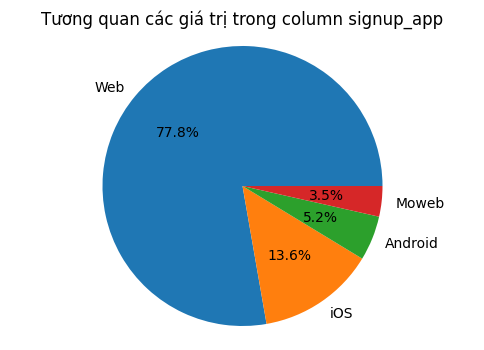

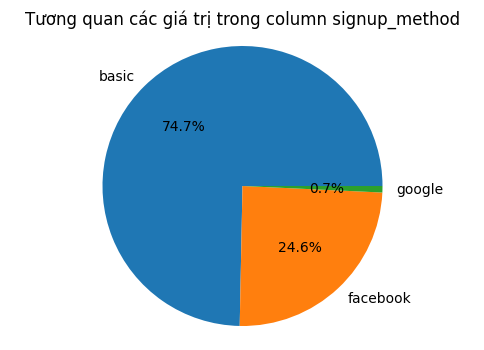

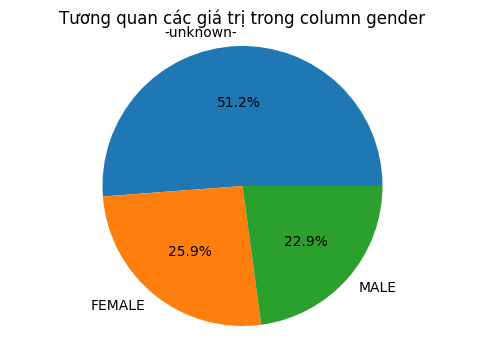

In [ ]:
pie_ls = ['signup_app', 'signup_method', 'gender']
for i in pie_ls:
  i_types = data[i].value_counts()
  total_i = i_types.sum() # Tính tổng

  # Tính phần trăm
  i_types_pct = i_types / total_i * 100

  # Tạo biểu đồ hình tròn
  fig, ax = plt.subplots(figsize=(6,4))
  ax.pie(i_types.values, labels = i_types.index, autopct='%1.1f%%')
  ax.axis('equal')
  ax.set_title(f'Tương quan các giá trị trong column {i}')

  plt.show()

***2.Biểu đồ bar cho các columns còn lại***

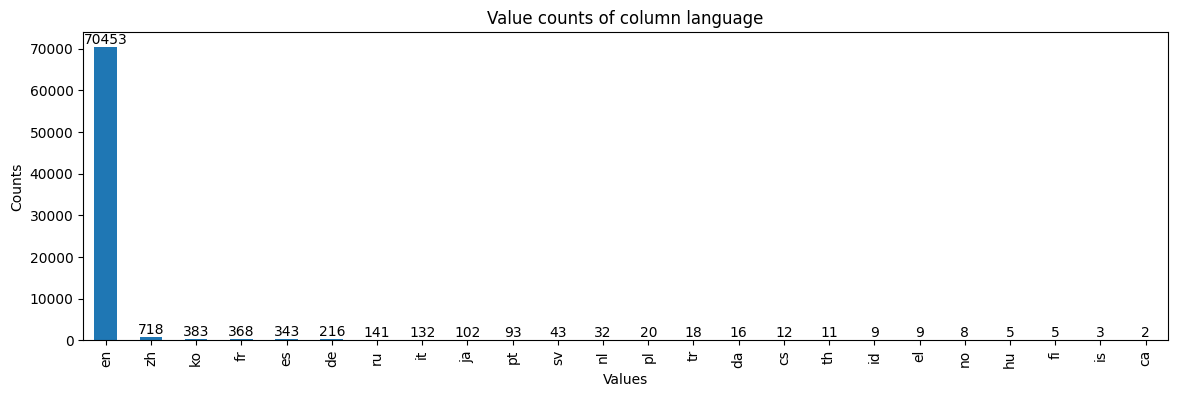

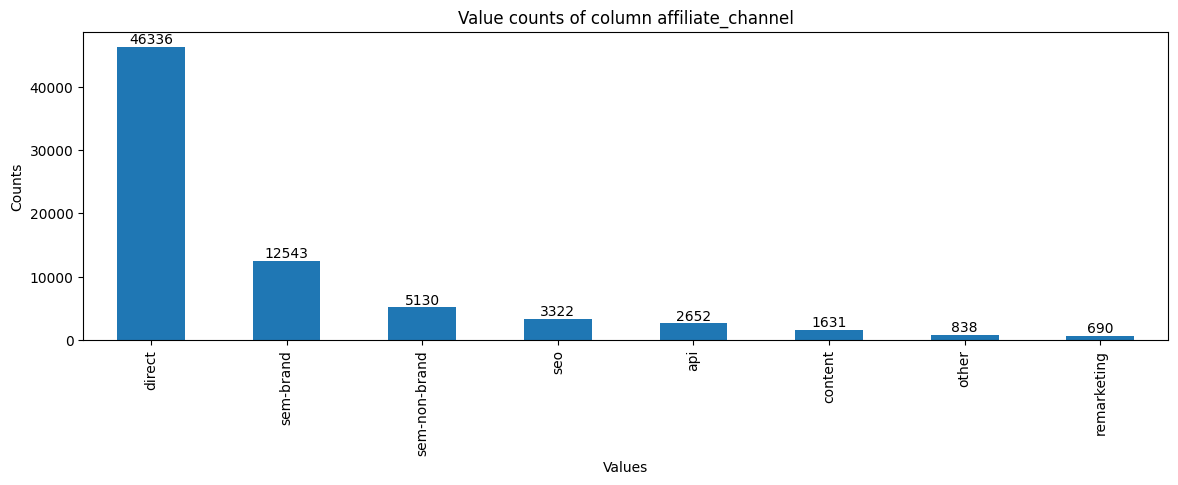

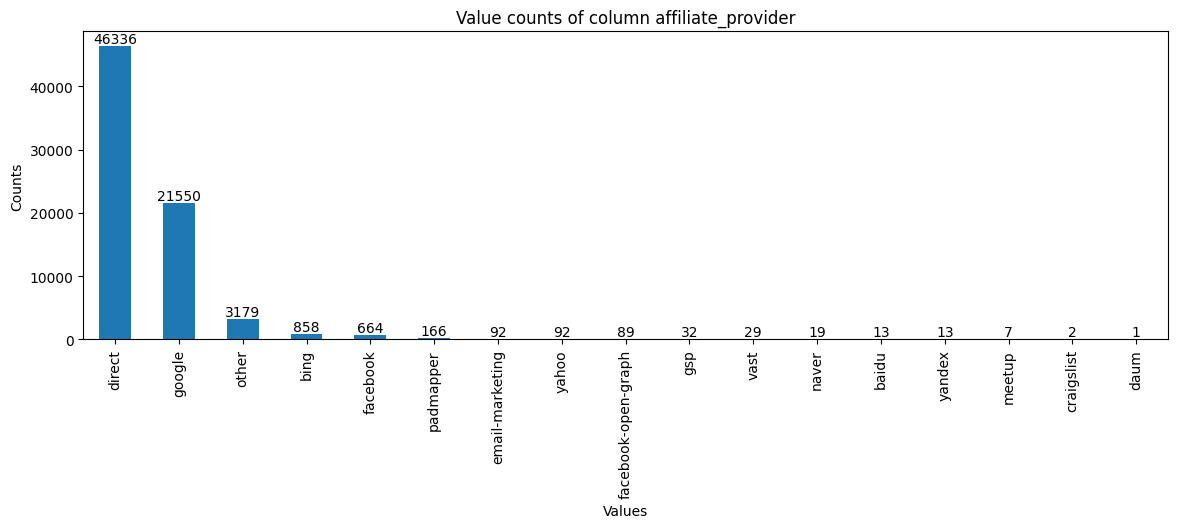

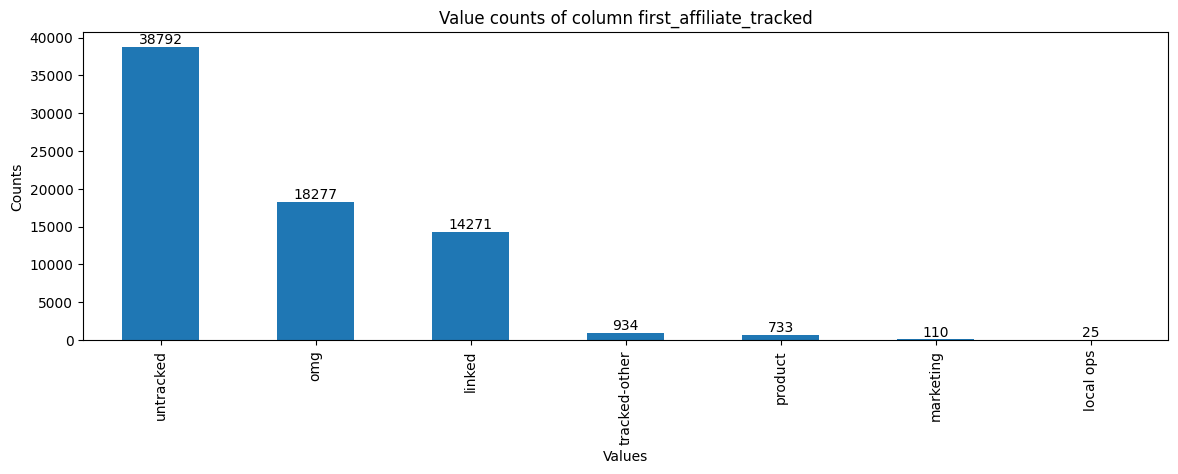

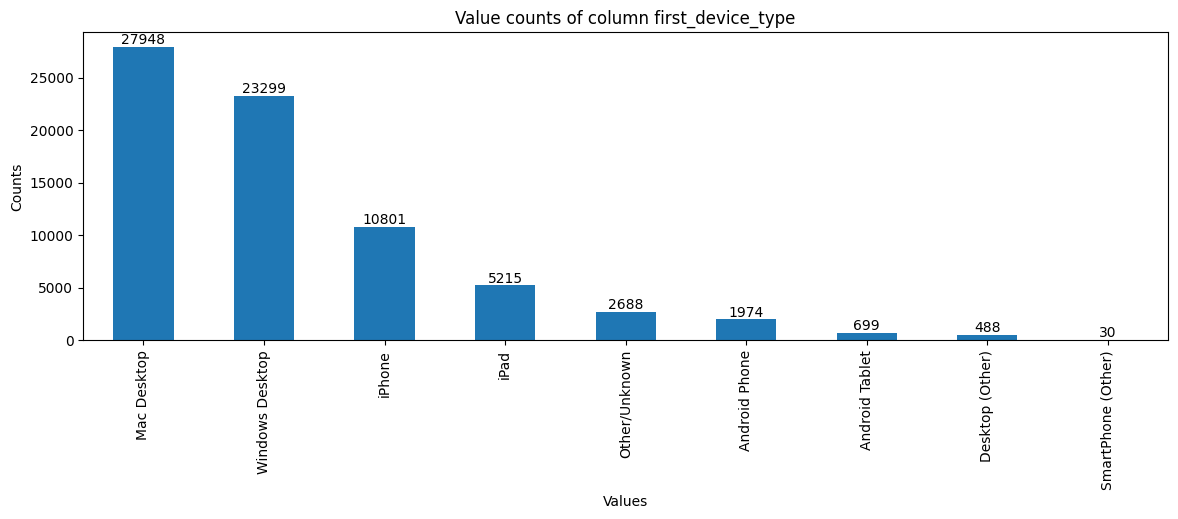

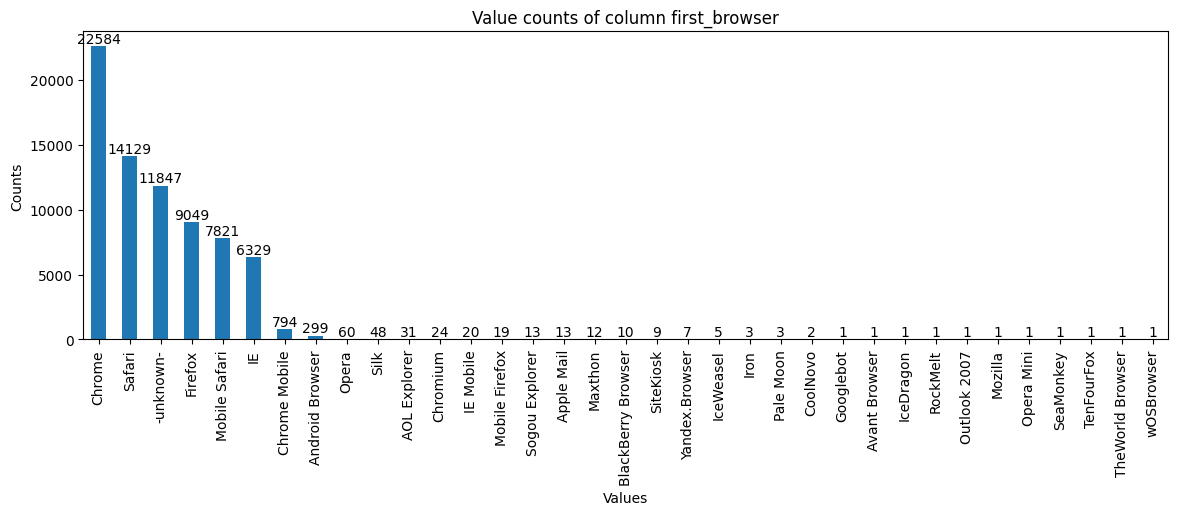

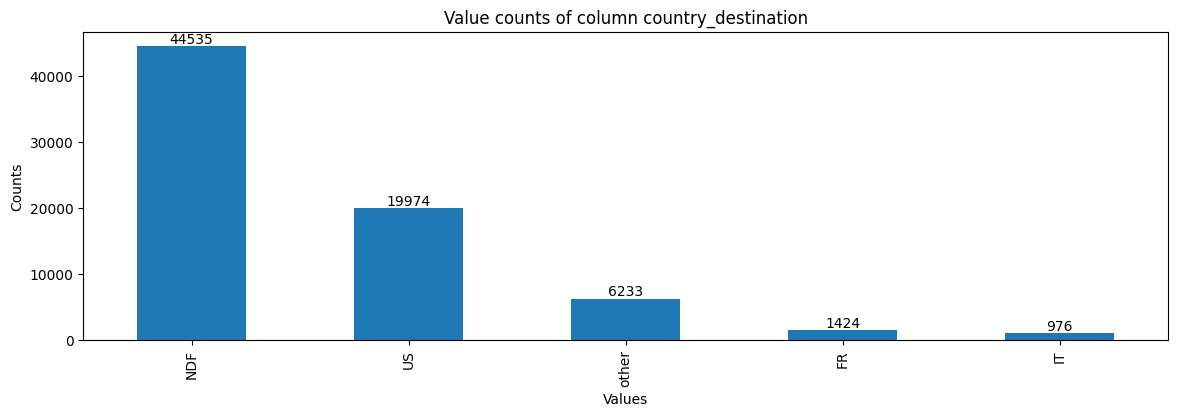

In [ ]:
obj_cols = data.select_dtypes(include='object').columns

bar_ls = obj_cols[~obj_cols.isin(pie_ls)]
for i in bar_ls:
  plt.figure(figsize=(14, 4))
  value_counts = data.groupby([data[i]]).size().sort_values(ascending=False)
  value_counts.plot(kind='bar')
  plt.title(f'Value counts of column {i}')
  plt.xlabel('Values')
  plt.ylabel('Counts')
  for index, value in enumerate(value_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
  plt.show()

**II.DATA CHECKING**

***1.Kiểm định Chi-squared cho các column Object:***

In [ ]:
obj_cols = data.select_dtypes(include='object').columns
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in obj_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['country_destination']))
    print(i, '---', pval)
    if pval > 0.05:
        remove_obj_cols.append(i)
    else:
      continue

print(remove_obj_cols)

gender --- 0.0
signup_method --- 5.875400836541008e-34
language --- 3.9201735117920487e-23
affiliate_channel --- 8.997838903130533e-180
affiliate_provider --- 6.669282364297938e-27
first_affiliate_tracked --- 6.606416673428266e-18
signup_app --- 0.0
first_device_type --- 0.0
first_browser --- 0.0
country_destination --- 0.0
[]


***2.Kiểm định Spearman cho các column Number:***

In [ ]:
spear_cols = data.select_dtypes(exclude=['object']).columns
spear_cols = spear_cols.append(pd.Index(['country_destination']))
spear_df = data[spear_cols]

In [ ]:
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spear_df.columns:
    if spear_df[col].nunique() > 1:  # Kiểm tra nếu cột có nhiều hơn 1 giá trị duy nhất
        corr, p_value = spearmanr(spear_df[col], spear_df['country_destination'])  # Tính Spearman Correlation
        correlation_results.append((col, corr, p_value))
    else:
        print(f"Cột {col} có giá trị không thay đổi và bị bỏ qua.")

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])

In [ ]:
correlation_df=correlation_df.sort_values(by='Spearman Correlation', ascending=False)
for index, row in correlation_df.iterrows():
    print(f"Spearman Correlation: {row['Spearman Correlation']}, p-value: {row['p-value']}")

Spearman Correlation: 1.0, p-value: 0.0
Spearman Correlation: 0.29949595249137084, p-value: 0.0
Spearman Correlation: 0.26385912739524975, p-value: 0.0
Spearman Correlation: 0.2614212131929328, p-value: 0.0
Spearman Correlation: 0.2512996687538315, p-value: 0.0
Spearman Correlation: 0.25111030313265004, p-value: 0.0
Spearman Correlation: 0.24696731683424247, p-value: 0.0
Spearman Correlation: 0.24696731683424247, p-value: 0.0
Spearman Correlation: 0.23441132570234036, p-value: 0.0
Spearman Correlation: 0.23062675181115805, p-value: 0.0
Spearman Correlation: 0.20011495010464536, p-value: 0.0
Spearman Correlation: 0.19256594055868473, p-value: 0.0
Spearman Correlation: 0.19256594055868473, p-value: 0.0
Spearman Correlation: 0.16639809886697218, p-value: 0.0
Spearman Correlation: 0.16563933464805514, p-value: 0.0
Spearman Correlation: 0.14865979693487325, p-value: 0.0
Spearman Correlation: 0.14840775648550758, p-value: 0.0
Spearman Correlation: 0.14840775648550758, p-value: 0.0
Spearman C

In [ ]:
remove_spear_cols = []
for i, row in correlation_df.iterrows():
    if row['Spearman Correlation'] > 0.05:
      continue
    elif row['Spearman Correlation'] > 0.05:
      continue
    else:
      remove_spear_cols.append(row['Feature'])

In [ ]:
#Xóa đi những columns không phù hợp với điều kiện Spearman và p-value
data = data.drop(columns = remove_spear_cols)

In [ ]:
#Data còn lại sau khi tính toán Chi-Squared và Spearman
data

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,...,post_checkout_action,profile_references,profile_verifications,request_new_confirm_email_y,send_message,similar_listings_y,update_user_profile,user_profile_content_update,wishlist_content_update,your_trips
0,MALE,basic,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,25.0,0.0
1,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-unknown-,basic,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,...,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,10.0,0.0
4,-unknown-,basic,en,direct,direct,untracked,iOS,iPhone,-unknown-,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73137,MALE,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,...,0.0,2.0,6.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0
73138,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,0.0
73139,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
73140,-unknown-,basic,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**III.ENCODING DATA**

In [ ]:
obj_cols = data.select_dtypes(include='object').columns
for i in obj_cols:
  print(data[i].value_counts())
  print('\n')

gender
-unknown-    37444
FEMALE       18973
MALE         16725
Name: count, dtype: int64


signup_method
basic       54625
facebook    17973
google        544
Name: count, dtype: int64


language
en    70453
zh      718
ko      383
fr      368
es      343
de      216
ru      141
it      132
ja      102
pt       93
sv       43
nl       32
pl       20
tr       18
da       16
cs       12
th       11
id        9
el        9
no        8
fi        5
hu        5
is        3
ca        2
Name: count, dtype: int64


affiliate_channel
direct           46336
sem-brand        12543
sem-non-brand     5130
seo               3322
api               2652
content           1631
other              838
remarketing        690
Name: count, dtype: int64


affiliate_provider
direct                 46336
google                 21550
other                   3179
bing                     858
facebook                 664
padmapper                166
yahoo                     92
email-marketing           92
facebo

***Hàm chỉ định ánh xạ các giá trị của columns object:***

In [ ]:
def map_columns(data, column_names=['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider',
                                    'first_affiliate_tracked', 'signup_app', 'first_device_type',
                                    'first_browser', 'country_destination']):
    # Các ánh xạ giá trị cho các cột khác nhau
    Gender_mapping = {'-unknown-': 0, 'FEMALE': 1, 'MALE': 2} #(done)

    Signup_mapping = {'basic': 0, 'facebook': 1, 'google': 2, 'weibo': 3} #(done)

    Language_mapping = {'en': 0, 'zh': 1, 'ko': 2, 'fr': 3, 'es': 4, 'de': 5, 'ru': 6, 'it': 7, 'ja': 8,
                        'pt': 9, 'sv': 10, 'nl': 11, 'pl': 12, 'tr': 13, 'da': 14, 'cs': 15, 'th': 16,
                        'id': 17, 'el': 18, 'no': 19, 'fi': 20, 'hu': 21, 'is': 22, 'ca': 23, '-unknown-': 24} #(done)

    Channel_mapping = {'direct': 0, 'sem-brand': 1, 'sem-non-brand': 2, 'seo': 3, 'api': 4, 'content': 5,
                       'other': 6, 'remarketing': 7}  #(done)

    Provider_mapping = {'direct': 0, 'google': 1, 'other': 2, 'bing': 3, 'facebook': 4, 'padmapper': 5,
                        'yahoo': 6, 'email-marketing': 7, 'facebook-open-graph': 8, 'gsp': 9, 'vast': 10,
                        'naver': 11, 'baidu': 12, 'yandex': 13, 'meetup': 14, 'craigslist': 15, 'daum': 16} #(done)

    First_tracked_mapping = {'untracked': 0, 'omg': 1, 'linked': 2, 'tracked-other': 3, 'product': 4,
                             'marketing': 5, 'local ops': 6} #(done)

    App_mapping = {'Web': 0, 'iOS': 1, 'Android': 2, 'Moweb': 3}  #(done)

    First_device_mapping = {'Mac Desktop': 0, 'Windows Desktop': 1, 'iPhone': 2, 'iPad': 3,
                            'Other/Unknown': 4, 'Android Phone': 5, 'Android Tablet': 6,
                            'Desktop (Other)': 7, 'SmartPhone (Other)': 8}    #(done)

    First_browser_mapping = {'Chrome': 0, 'Safari': 1, '-unknown-': 2, 'Firefox': 3, 'Mobile Safari': 4,
                             'IE': 5, 'Chrome Mobile': 6, 'Android Browser': 7, 'Opera': 8, 'Silk': 9,
                             'AOL Explorer': 10, 'Chromium': 11, 'IE Mobile': 12, 'Mobile Firefox': 13,
                             'Apple Mail': 14, 'Sogou Explorer': 15, 'Maxthon': 16, 'BlackBerry Browser': 17,
                             'SiteKiosk': 18, 'Yandex.Browser': 19, 'IceWeasel': 20, 'Iron': 21, 'Pale Moon': 22,
                             'CoolNovo': 23, 'Opera Mini': 24, 'wOSBrowser': 25, 'SeaMonkey': 26,
                             'TenFourFox': 27, 'Mozilla': 28, 'Googlebot': 29, 'Outlook 2007': 30,
                             'IceDragon': 31, 'TheWorld Browser': 32, 'RockMelt': 33, 'Avant Browser': 34}

    Country_mapping = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {
        'gender': Gender_mapping,
        'signup_method': Signup_mapping,
        'language': Language_mapping,
        'affiliate_channel': Channel_mapping,
        'affiliate_provider': Provider_mapping,
        'first_affiliate_tracked': First_tracked_mapping,
        'signup_app': App_mapping,
        'first_device_type': First_device_mapping,
        'first_browser': First_browser_mapping,
        'country_destination': Country_mapping
    }

    for column in column_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data

In [ ]:
data = map_columns(data)

***Oversampling***

In [ ]:
smote_df = data[data['country_destination'].isin([3, 4])]
remaining_df = data[~data['country_destination'].isin([3, 4])]

In [ ]:
X_smote = smote_df.drop('country_destination', axis=1)
y_smote = smote_df['country_destination']

smote = SMOTE(sampling_strategy={3: 15000, 4: 15000}, random_state=42)
X_resample, y_resample = smote.fit_resample(X_smote, y_smote)

In [ ]:
smote_resampled_df = pd.concat([X_resample, y_resample], axis=1)

In [ ]:
data_new = pd.concat([remaining_df, smote_resampled_df], axis=0)
data_new

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,...,post_checkout_action,profile_references,profile_verifications,request_new_confirm_email_y,send_message,similar_listings_y,update_user_profile,user_profile_content_update,wishlist_content_update,your_trips
0,2,0,0,2,1,1,0,1,0,2,...,0.000000,0.0,0.0,0.0,0.0,9.000000,0.0,0.000000,25.000000,0.000000
1,0,0,0,0,0,0,0,0,3,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.000000
2,0,0,0,1,1,1,0,1,3,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
3,0,0,0,0,0,2,0,1,0,0,...,0.000000,0.0,0.0,0.0,0.0,28.000000,0.0,0.000000,10.000000,0.000000
4,0,0,0,0,0,0,1,2,2,2,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,0,0,0,0,0,2,4,6,4,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
29996,1,0,0,0,0,0,0,1,0,4,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
29997,0,0,0,0,0,0,0,0,0,4,...,2.039893,0.0,0.0,0.0,0.0,6.376064,0.0,2.000000,9.000000,0.623936
29998,0,0,0,0,0,0,0,1,0,4,...,0.119563,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.059782


**IV.TRAINING**

In [ ]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

In [ ]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data_new, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data_new.drop(columns=['country_destination'], axis=1)
    features = X.columns

    y = data_new['country_destination']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

***I.Random Forest***

*Tốt*

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(data_new)

# Khởi tạo mô hình Balanced Random Forest
model_RF = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

           0       0.94      0.78      0.85     35546
           1       0.80      0.85      0.82     15925
           2       0.50      0.99      0.67      5038
           3       0.98      0.98      0.98     12072
           4       0.98      0.99      0.99     12012

    accuracy                           0.87     80593
   macro avg       0.84      0.92      0.86     80593
weighted avg       0.90      0.87      0.88     80593

              precision    recall  f1-score   support

           0       0.80      0.66      0.73      8989
           1       0.47      0.40      0.44      4049
           2       0.13      0.41      0.20      1195
           3       0.94      0.86      0.90      2928
           4       0.94      0.92      0.93      2988

    accuracy                           0.66     20149
   macro avg       0.66      0.65      0.64     20149
weighted avg       0.74      0.66      0.69     20149



***2.XG BOOST***

In [ ]:
#XGBOOST
X_train, X_test, y_train, y_test = preprocess_data(data_new)

model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     35546
           1       0.64      0.57      0.60     15925
           2       0.96      0.14      0.24      5038
           3       0.96      0.84      0.90     12072
           4       0.96      0.88      0.92     12012

    accuracy                           0.79     80593
   macro avg       0.85      0.67      0.70     80593
weighted avg       0.80      0.79      0.77     80593

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      8989
           1       0.55      0.50      0.52      4049
           2       0.28      0.02      0.03      1195
           3       0.91      0.79      0.84      2928
           4       0.93      0.83      0.87      2988

    accuracy                           0.74     20149
   macro avg       0.68      0.61      0.62     20149
weighted avg       0.72      0.74      0.72     20149



***Tìm cách cải thiện XG Boost***

In [ ]:
importances2 = model_XGB.feature_importances_
features2 = data_new.drop(columns = ['country_destination'], axis=1).columns

# Tạo DataFrame để dễ dàng xử lý và sắp xếp
importance_df2 = pd.DataFrame({'Feature': features2, 'Importance': importances2})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

In [ ]:
importance_df2

,Feature,Importance
64,booking_request,0.129969
46,pending_x,0.053983
1,signup_method,0.041257
25,confirm_email_x,0.040892
27,create,0.034989
...,...,...
73,cancellation_policies_y,0.000000
72,at_checkpoint_y,0.000000
71,apply_coupon,0.000000
67,partner_callback,0.000000


In [ ]:
chosed_importance_features2 = importance_df2[importance_df2['Importance']>0.005]['Feature'].tolist()
df2 = data_new[chosed_importance_features2 + ['country_destination']]

In [ ]:
df2

,booking_request,pending_x,signup_method,confirm_email_x,create,confirm_email_link,verify,at_checkpoint_x,message_post_x,gender,...,similar_listings_x,kba,create_phone_numbers,update_user_profile,message_to_host_change_x,pay,12,agree_terms_check,language,country_destination
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2,...,9.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,2
1,0.000000,0.000000,0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
2,1.000000,1.000000,0,0.000000,4.000000,0.000000,1.000000,0.0,1.000000,0,...,0.000000,0.0,3.000000,0.0,0.0,0.000000,0.0,0.0,0,0
3,0.000000,0.000000,0,1.000000,2.000000,1.000000,0.000000,0.0,0.000000,0,...,28.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
4,0.000000,0.000000,0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.935934,0.935934,0,0.064066,7.551536,0.064066,0.000000,0.0,3.871868,2,...,0.000000,0.0,0.000000,0.0,0.0,0.935934,0.0,0.0,0,4
29996,0.000000,0.000000,0,0.000000,0.176086,0.000000,0.000000,0.0,0.000000,1,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,4
29997,1.623936,1.623936,0,1.000000,1.000000,1.000000,0.207979,0.0,1.415957,0,...,6.376064,0.0,0.207979,0.0,0.0,0.000000,0.0,0.0,0,4
29998,0.059782,0.059782,0,0.059782,2.239126,0.059782,0.059782,0.0,0.059782,0,...,0.000000,0.0,0.298908,0.0,0.0,0.000000,0.0,0.0,0,4


In [ ]:
param_grid = {
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
    'learning_rate'   : [0.001, 0.01, 0.1, 1],
    'max_depth'       : [3, 5, 8, 10],
    'alpha'           : [1, 10, 100],
    'n_estimators'    : [10, 50, 100]
}

answers_grid = {
    'combination'       : [],
    'train_Accuracy'    : [],
    'test_Accuracy'     : [],
    'colsample_bytree'  : [],
    'learning_rate'     : [],
    'max_depth'         : [],
    'alpha'             : [],
    'n_estimators'      : []
}

In [ ]:
# Tạo một lưới các tham số
param_list = list(ParameterGrid(param_grid))

for params in param_list:
    # Tạo mô hình với các tham số hiện tại
    model_XGB_new = xgb.XGBClassifier(
        objective='multi:softmax',  # Sử dụng mục tiêu phân loại nhiều lớp
        num_class=5,                # Số lớp đầu ra
        colsample_bytree=params['colsample_bytree'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        alpha=params['alpha'],
        n_estimators=params['n_estimators']
    )

    # Huấn luyện mô hình
    model_XGB_new.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện và kiểm tra
    y_train_pred = model_XGB_new.predict(X_train)
    y_test_pred = model_XGB_new.predict(X_test)

    # Tính toán độ chính xác
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Lưu trữ kết quả
    answers_grid['combination'].append(params)
    answers_grid['train_Accuracy'].append(train_accuracy)
    answers_grid['test_Accuracy'].append(test_accuracy)
    answers_grid['colsample_bytree'].append(params['colsample_bytree'])
    answers_grid['learning_rate'].append(params['learning_rate'])
    answers_grid['max_depth'].append(params['max_depth'])
    answers_grid['alpha'].append(params['alpha'])
    answers_grid['n_estimators'].append(params['n_estimators'])

# In kết quả tham số tốt nhất dựa trên độ chính xác tập kiểm tra
best_index = answers_grid['test_Accuracy'].index(max(answers_grid['test_Accuracy']))
print("Best Hyperparameters:", answers_grid['combination'][best_index])

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**TESTING**

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/airbnb-recruiting-new-user-bookings/New/airbnb-recruiting-new-user-bookings-test-(CHANGED).csv')
test_data

,Unnamed: 0,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,jtl0dijy2j,2014-07-01,20140701000051,-unknown-,33.0,basic,0,en,direct,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,xx0ulgorjt,2014-07-01,20140701000148,-unknown-,35.0,basic,0,en,direct,...,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,3,6c6puo6ix0,2014-07-01,20140701000215,-unknown-,35.0,basic,0,en,direct,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,4,czqhjk3yfe,2014-07-01,20140701000305,-unknown-,35.0,basic,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61622,61663,cv0na2lf5a,2014-09-30,20140930235232,-unknown-,31.0,basic,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2.0,0.0
61623,61664,zp8xfonng8,2014-09-30,20140930235306,-unknown-,35.0,basic,23,ko,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61624,61665,fa6260ziny,2014-09-30,20140930235408,-unknown-,35.0,basic,0,de,direct,...,0.0,21.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0
61625,61666,87k0fy4ugm,2014-09-30,20140930235430,-unknown-,35.0,basic,0,en,sem-brand,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
#Giữ lại tất cả các cols giống như cols trong data_new ở trong tập test
data_new_cols = data_new.columns.tolist()
test_data = test_data[data_new_cols]
test_data

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,12,...,post_checkout_action,profile_references,profile_verifications,request_new_confirm_email_y,send_message,similar_listings_y,update_user_profile,user_profile_content_update,wishlist_content_update,your_trips
0,FEMALE,facebook,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-unknown-,basic,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
3,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,IE,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Safari,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61622,-unknown-,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,0.0
61623,-unknown-,basic,ko,direct,direct,untracked,Android,Android Phone,-unknown-,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61624,-unknown-,basic,de,direct,direct,linked,Web,Windows Desktop,Firefox,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,12.0,1.0
61625,-unknown-,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0


In [ ]:
obj_cols = test_data.select_dtypes(include='object').columns
for i in obj_cols:
  print(test_data[i].value_counts())
  print('\n')

gender
-unknown-    33531
FEMALE       14404
MALE         13692
Name: count, dtype: int64


signup_method
basic       44948
facebook    14776
google       1882
weibo          21
Name: count, dtype: int64


language
en           58781
zh             992
ko             362
fr             334
es             256
de             243
ja             119
ru             119
it             119
pt              82
sv              54
nl              37
tr              28
no              21
pl              20
cs              17
da              17
hu               7
el               6
fi               6
th               4
ca               1
-unknown-        1
id               1
Name: count, dtype: int64


affiliate_channel
direct           43478
sem-brand        10339
seo               5664
sem-non-brand     1221
other              584
remarketing        171
content            170
Name: count, dtype: int64


affiliate_provider
direct                 43478
google                 14183
facebook         

In [ ]:
#Xóa đi những dòng mà giá trị của chúng quá ít
test_data = test_data[~test_data['first_browser'].isin(['UC Browser', 'Opera Mobile', 'CometBird', 'Nintendo Browser', 'IBrowse'])]

In [ ]:
#Encoding cho test data
map_columns(test_data)

In [ ]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(test_data)

In [ ]:
# Sử dụng mô hìnhXG BOOST để dự đoán
y_test_pred = model_XGB.predict(X_test)
test_data['Predicted_Output'] = y_test_pred

In [ ]:
test_data

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,12,...,profile_references,profile_verifications,request_new_confirm_email_y,send_message,similar_listings_y,update_user_profile,user_profile_content_update,wishlist_content_update,your_trips,Predicted_Output
0,1,1,0,0,0,0,3,2,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0,0,0,0,0,0,3,2,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0,0,0,0,0,2,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3
3,0,0,0,0,0,2,0,1,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4
4,0,0,0,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61622,0,0,0,0,0,0,0,1,5,0.0,...,1.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,0.0,3
61623,0,0,2,0,0,0,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
61624,0,0,5,0,0,2,0,1,3,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,12.0,1.0,4
61625,0,0,0,1,1,1,0,0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,4


In [ ]:
test_data['Predicted_Output'].value_counts()

,count
Predicted_Output,
3,32922
4,19075
0,7965
1,1629
2,30
